In [1]:
import json 
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

from gensim.models import TfidfModel
from nltk.tokenize import word_tokenize
from gensim import corpora
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
%matplotlib inline
import seaborn as sns

C:\Users\lenovo\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
data = []
with open('./TestHeur/datasample.json') as f:
    for line in f:
        json_line = json.loads(line)
        data.append(json_line)

In [3]:
df_1 = pd.DataFrame.from_dict(json_normalize(data), orient = "columns")

In [4]:
dataset = pd.concat([df_1['author.id'], df_1['ts'], df_1['content'], 
                     df_1['followed'], df_1['follows'], df_1['likes'], 
                     df_1['country'],  df_1['continent'], df_1['city'],
                     df_1['content_disamb'],df_1['content_entities'],df_1['content_position_sentences'],
                     df_1['content_scores.commercial_score'],df_1['content_scores.hashtag_score'],df_1['content_scores.structuredsentence_score'],
                     df_1['media']], axis = 1)


In [5]:
dataset['content_length'] = dataset['content'].map(str).apply(len)

In [6]:
dataset.describe()

,ts,followed,follows,likes,content_scores.commercial_score,content_scores.hashtag_score,content_scores.structuredsentence_score,content_length
count,8.809000e+03,8.809000e+03,8809.000000,8.809000e+03,8805.000000,8805.000000,8805.000000,8809.000000
mean,1.498779e+09,3.740011e+06,836.716199,2.362638e+04,0.018356,0.002612,0.624377,147.801112
std,2.367440e+07,9.629931e+06,1033.134837,1.317402e+05,0.133183,0.051045,0.590053,132.108136
min,1.451641e+09,7.920000e+02,0.000000,6.000000e+00,0.000000,0.000000,-0.010000,1.000000
25%,1.480448e+09,1.289970e+05,211.000000,1.135000e+03,0.000000,0.000000,0.000000,61.000000
50%,1.504640e+09,4.047960e+05,627.000000,3.506000e+03,0.000000,0.000000,0.555556,109.000000
75%,1.517506e+09,2.906167e+06,1016.000000,1.679200e+04,0.000000,0.000000,1.071429,194.000000
max,1.538342e+09,1.203301e+08,7497.000000,4.704578e+06,1.000000,1.000000,3.333333,2198.000000


# Data visualization 

# Basic Correlation matrix with Seaborn

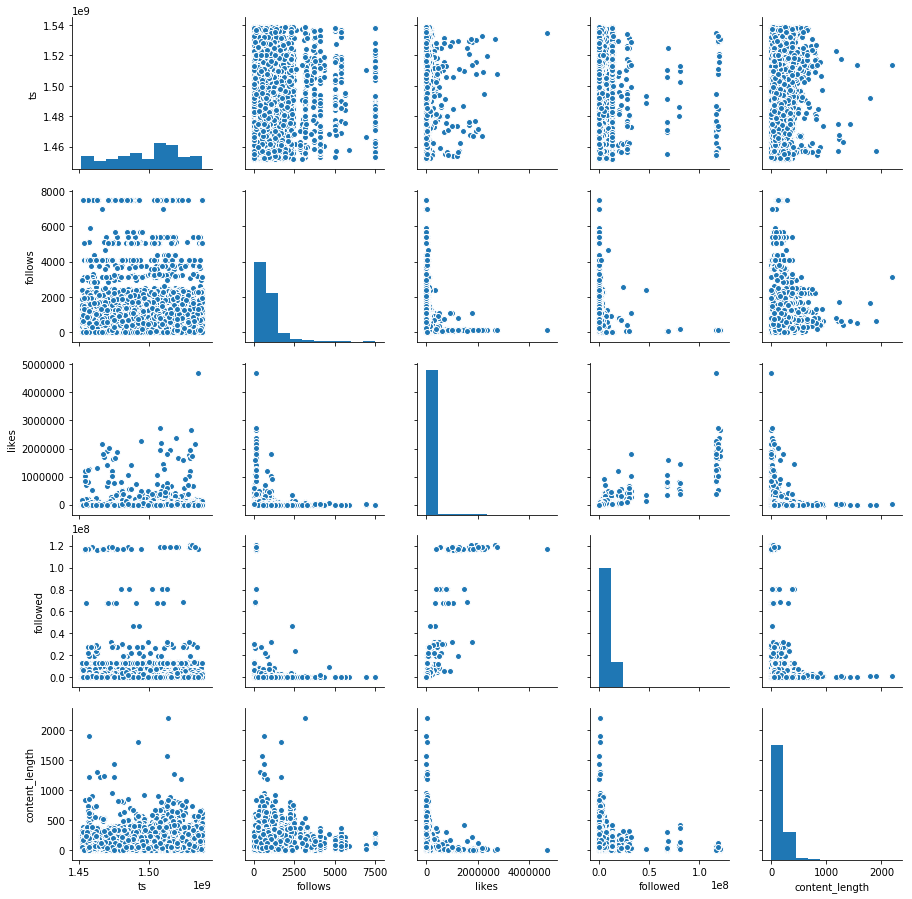

In [7]:
user=dataset[["ts", "follows", "likes", 'followed','content_length']]
sns.pairplot(user)

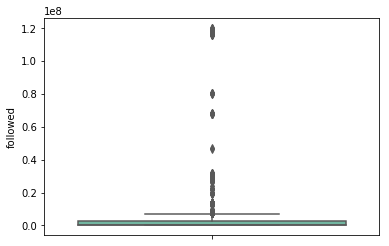

In [8]:
sns.boxplot(y="followed", data=dataset, palette="Set2")

[Text(0.5,0,'')]

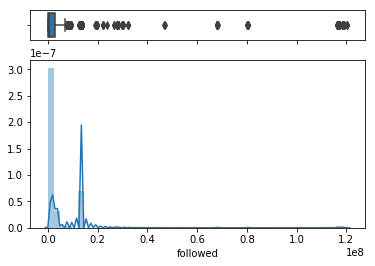

In [9]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(dataset["followed"], ax=ax_box)
sns.distplot(dataset["followed"], ax=ax_hist)
ax_box.set(xlabel='')

[Text(0.5,0,'')]

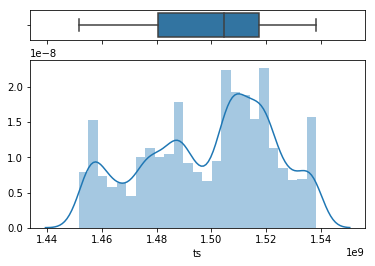

In [10]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(dataset["ts"], ax=ax_box)
sns.distplot(dataset["ts"], ax=ax_hist)
ax_box.set(xlabel='')

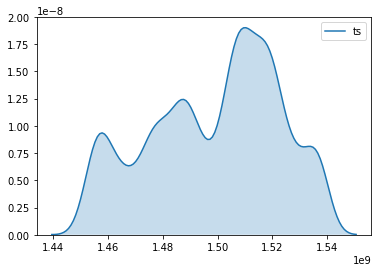

In [11]:
sns.kdeplot(dataset['ts'], shade=True)

[Text(0.5,0,'')]

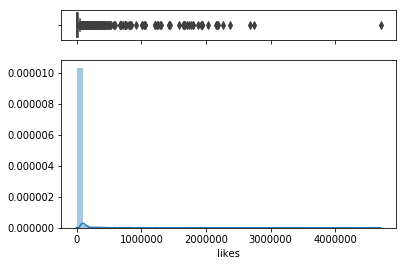

In [12]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(dataset["likes"], ax=ax_box)
sns.distplot(dataset["likes"], ax=ax_hist)
ax_box.set(xlabel='')

[Text(0.5,0,'')]

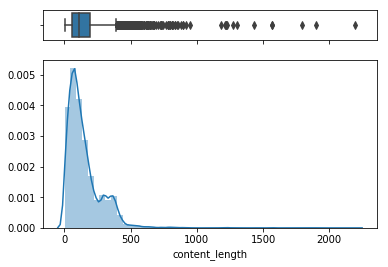

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(dataset["content_length"], ax=ax_box)
sns.distplot(dataset["content_length"], ax=ax_hist)
ax_box.set(xlabel='')


In [14]:
dataset['category'] = pd.cut(dataset['followed'],[-np.inf, 0.01e+08, 0.1e+08, 0.5e+08, 1e+08, np.inf], right=False, labels=['noob','trying','madeit','famous', 'beyonces'])

# PCA

In [15]:
from sklearn.preprocessing import StandardScaler
features = ['ts','followed', 'follows','likes','content_length']
x = dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)
x

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.49204187, -0.36069283, -0.76346372, -0.1137939 , -0.90689277],
       [ 0.18389589, -0.38352015, -0.25527275, -0.16510233, -0.83876289],
       [-1.80138426, -0.37943038,  0.51620955, -0.1742041 , -0.02120438],
       ...,
       [-1.84969069,  1.01492635, -0.80799093, -0.00766992,  0.69037432],
       [ 1.24756038, -0.38506313, -0.26688854, -0.17337666,  0.94018386],
       [ 0.73355826, -0.38075351,  0.23549454, -0.17368031, -0.67979318]])

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [17]:
print(pca.components_) 

[[-0.06238451  0.68858928 -0.24354032  0.65737342 -0.17464615]
 [ 0.71827882  0.0073519  -0.4573863   0.03005829  0.52336962]]


In [18]:
finalDf = pd.concat([principalDf, dataset[['category']]], axis = 1)

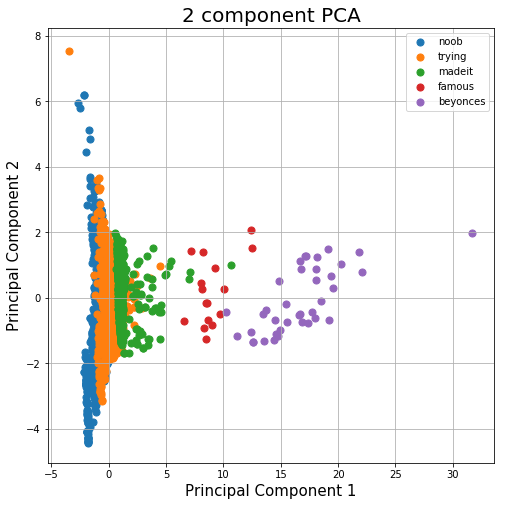

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['noob','trying' ,'madeit' ,'famous' , 'beyonces']
colors = ['r', 'g', 'b','y','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

# Visualise % category

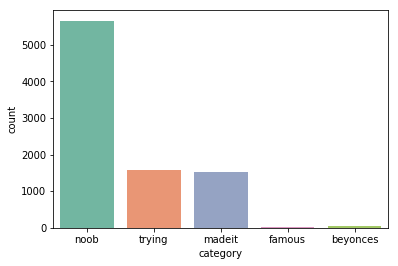

In [20]:
sns.countplot(x="category", data=dataset, palette="Set2")

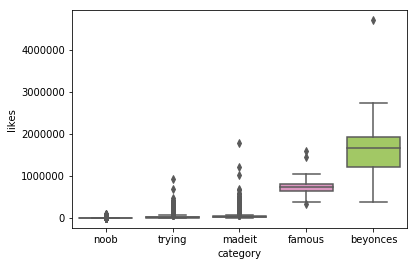

In [21]:
sns.boxplot(y="likes",x="category", data=dataset, palette="Set2")

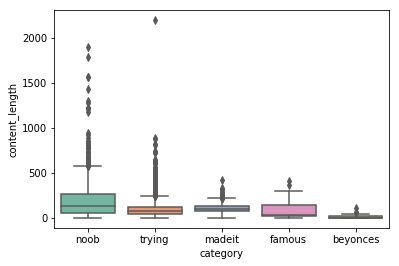

In [22]:
sns.boxplot(y="content_length",x="category", data=dataset, palette="Set2")

# Word Cloud

* Created 2 new variables:clean_text and clean_emojis





In [23]:
import re
emoji_regexp = u'[\U00002600-\U000026FF]|[\U00002700-\U000027BF]|[\U0001f300-\U0001f5fF]|[\U0001f600-\U0001f64F]|' \
               u'[\U0001f680-\U0001f6FF]|[\U00002A00-\U00002AFF]|[\U0001F1E0-\U0001F1FF]'

In [24]:
text = dataset['content'][1706]
print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"
        u"\U00002A00-\U00002AFF"
        u"\U00002600-\U000026FF"
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

❤️RESTOCK ALERT❤️ Search: "What I Want Tee"
✨www.FashionNova.com✨
️RESTOCK ALERT️ Search: "What I Want Tee"
www.FashionNova.com


In [25]:
from nltk.corpus import stopwords
def cleanup(sentence):
   
    try:
        letters_only = re.sub("[^a-zA-Z]", " ", sentence)
        emojis = re.findall(emoji_regexp, sentence, re.UNICODE)
    except:
        letters_only = ''
        emojis = []
    words = letters_only.lower().split()        
    words = [w for w in words if not w in stopwords.words("english")]
    words = [w for w in words if len(w) > 1]
    return (" ".join(words)), (" ".join(emojis))

In [26]:
clean = []
clean_emojis = []
for i in range( 0, dataset['content'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/8809*100))+"% done")
    x,y = cleanup(dataset['content'][i])
    clean.append(x)
    clean_emojis.append(y)

11% done
23% done
34% done
45% done
57% done
68% done
79% done
91% done


In [27]:
dataset['clean_text']=np.array(clean)
dataset['clean_emojis']=np.array(clean_emojis)

In [28]:
docs = "".join(word for word in dataset["clean_text"].map(str))

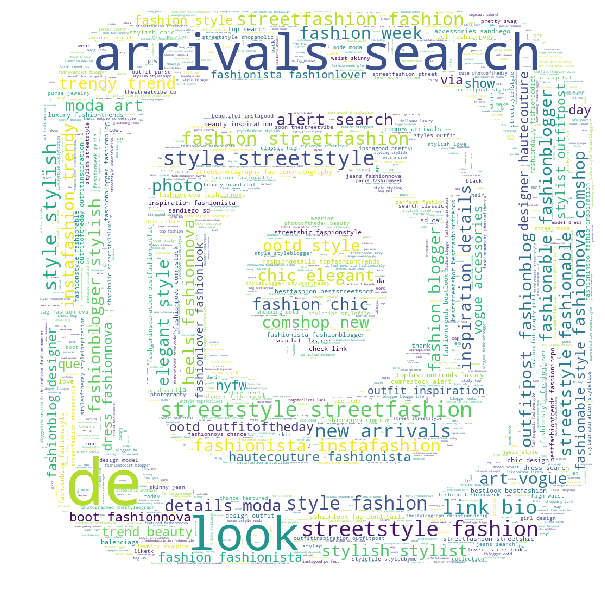

In [29]:
stopwords=set(STOPWORDS)
stopwords.update(["nbsp"])
maskf = np.array(Image.open("C:/Users/lenovo/Desktop/insta.png"))

texts=[]

for i in docs:
    raw = i.lower()
    tokens = word_tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in STOPWORDS]
    longer_tokens = [i for i in stopped_tokens if len(i) > 2]
    texts.append(longer_tokens)


dictionary = corpora.Dictionary(texts)

wc = WordCloud(
    background_color="white",
    max_words=1000,
    mask = maskf,
    stopwords=stopwords
).generate(docs)

plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# word cloud par category

Let's see the topics according to category. I'm gonna join the text data by category and calculate the term frequency-inverse document frequency (IF-IDF) for every word. A "document" in this context refers to text joined by either class. This will allow the words used more by one category and less by the other stand out in word clouds.




In [30]:
noob= dataset[dataset.category=="noob"]
trying= dataset[dataset.category=="trying"]
madeit=dataset[dataset.category=="madeit"]
famous=dataset[dataset.category=="famous"]
beyonces=dataset[dataset.category=="beyonces"]

In [31]:
docs = ["".join(word for word in noob['clean_text'].map(str)),"".join(word for word in trying['clean_text'].map(str)), "".join(word for word in madeit['clean_text'].map(str)), "".join(word for word in famous['clean_text'].map(str)), "".join(word for word in beyonces['clean_text'].map(str))]


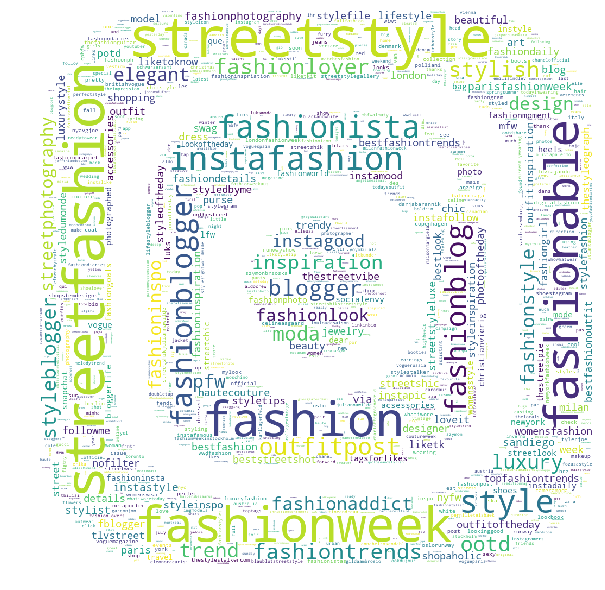

In [32]:
stopwords=set(STOPWORDS)
stopwords.update(["nbsp"])
maskf = np.array(Image.open("C:/Users/lenovo/Desktop/insta.png"))

texts=[]

for i in docs:
    raw = i.lower()
    tokens = word_tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in STOPWORDS]
    longer_tokens = [i for i in stopped_tokens if len(i) > 2]
    texts.append(longer_tokens)


dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

tfidf = TfidfModel(corpus)
weights = tfidf[corpus[0]]
weights = {dictionary[pair[0]] : pair[1] for pair in weights}
wc = WordCloud(
    background_color="white",
    max_words=1000,
    mask = maskf,
    stopwords=stopwords
).generate_from_frequencies(weights)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

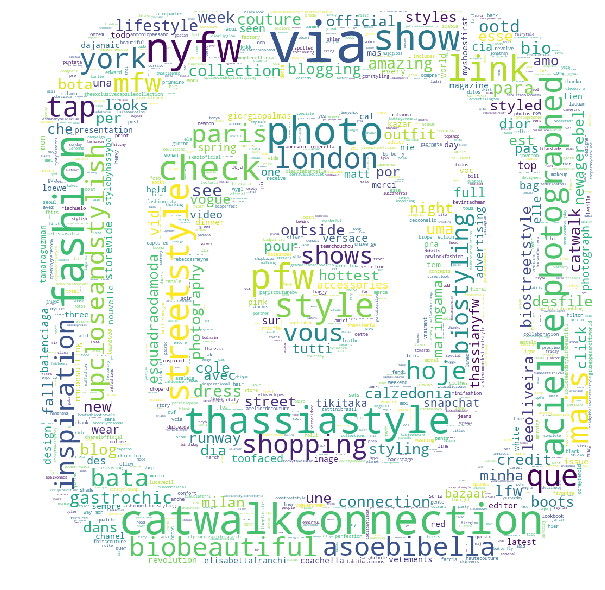

In [33]:
maskm = np.array(Image.open("C:/Users/lenovo/Desktop/insta.png"))

weights = tfidf[corpus[1]]
weights = {dictionary[pair[0]] : pair[1] for pair in weights}
wc = WordCloud(
    background_color="white",
    max_words=1000,
    mask = maskm,
    stopwords=stopwords
).generate_from_frequencies(weights)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

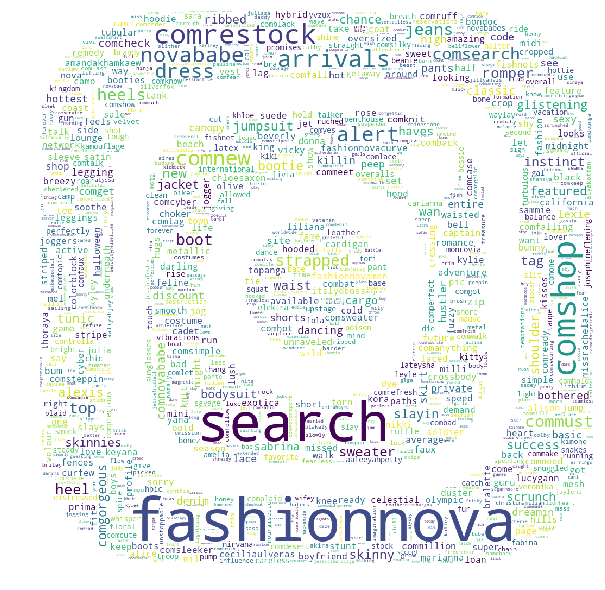

In [34]:
maskm = np.array(Image.open("C:/Users/lenovo/Desktop/insta.png"))

weights = tfidf[corpus[2]]
weights = {dictionary[pair[0]] : pair[1] for pair in weights}
wc = WordCloud(
    background_color="white",
    max_words=1000,
    mask = maskm,
    stopwords=stopwords
).generate_from_frequencies(weights)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

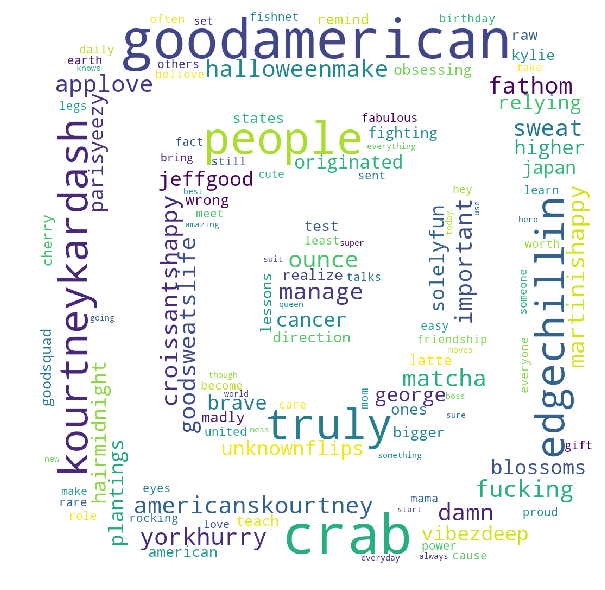

In [35]:
maskm = np.array(Image.open("C:/Users/lenovo/Desktop/insta.png"))

weights = tfidf[corpus[3]]
weights = {dictionary[pair[0]] : pair[1] for pair in weights}
wc = WordCloud(
    background_color="white",
    max_words=1000,
    mask = maskm,
    stopwords=stopwords
).generate_from_frequencies(weights)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

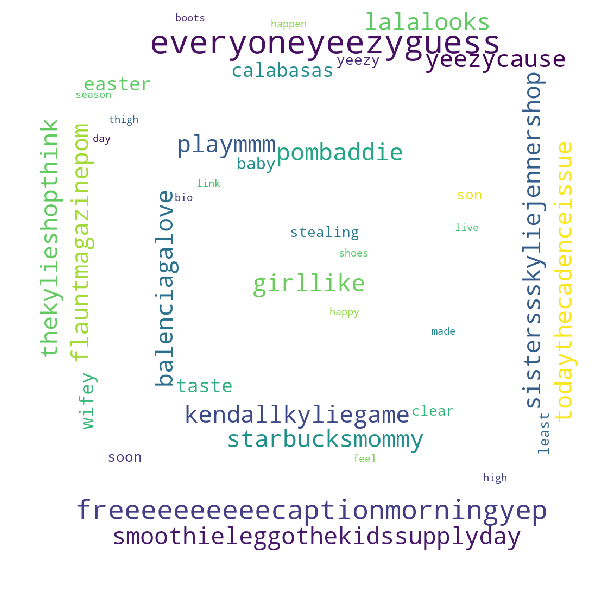

In [36]:
maskm = np.array(Image.open("C:/Users/lenovo/Desktop/insta.png"))

weights = tfidf[corpus[4]]
weights = {dictionary[pair[0]] : pair[1] for pair in weights}
wc = WordCloud(
    background_color="white",
    max_words=1000,
    mask = maskm,
    stopwords=stopwords
).generate_from_frequencies(weights)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Classification 
For all classifiers, I'll consider 80% of the data for training and 20% of it for testing the model. Also the training will occur on the TF-IDF vectors

In [37]:
from sklearn.model_selection import train_test_split
X= dataset['clean_text']
Y= dataset["category"]
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=101)

# Naive Bayes

In [38]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report

nbpipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])
nbpipeline.fit(X_train,y_train)
predictions = nbpipeline.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(classification_report(y_test,predictions))

[[   0    0    0    3    0]
 [   0    0    0    5    0]
 [   0    0  314   15    0]
 [   0    0    2 1111    4]
 [   0    0    0  262   46]]
             precision    recall  f1-score   support

   beyonces       0.00      0.00      0.00         3
     famous       0.00      0.00      0.00         5
     madeit       0.99      0.95      0.97       329
       noob       0.80      0.99      0.88      1117
     trying       0.92      0.15      0.26       308

avg / total       0.85      0.83      0.79      1762

             precision    recall  f1-score   support

   beyonces       0.00      0.00      0.00         3
     famous       0.00      0.00      0.00         5
     madeit       0.99      0.95      0.97       329
       noob       0.80      0.99      0.88      1117
     trying       0.92      0.15      0.26       308

avg / total       0.85      0.83      0.79      1762



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Linear SVM

In [39]:
from sklearn.linear_model import SGDClassifier
svmpipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', SGDClassifier(loss="hinge", tol=1e-3, max_iter=1000)),  
])
svmpipeline.fit(X_train, y_train)
predictions = svmpipeline.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[   0    0    0    3    0]
 [   0    0    0    4    1]
 [   0    0  316   11    2]
 [   0    0    0 1088   29]
 [   1    0    0  126  181]]
             precision    recall  f1-score   support

   beyonces       0.00      0.00      0.00         3
     famous       0.00      0.00      0.00         5
     madeit       1.00      0.96      0.98       329
       noob       0.88      0.97      0.93      1117
     trying       0.85      0.59      0.69       308

avg / total       0.90      0.90      0.89      1762



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfpipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', RandomForestClassifier(n_estimators=500)),  
])
rfpipeline.fit(X_train, y_train)
predictions = rfpipeline.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[   0    0    0    3    0]
 [   0    0    0    5    0]
 [   0    0  315   13    1]
 [   0    0    0 1090   27]
 [   1    0    1  149  157]]
             precision    recall  f1-score   support

   beyonces       0.00      0.00      0.00         3
     famous       0.00      0.00      0.00         5
     madeit       1.00      0.96      0.98       329
       noob       0.87      0.98      0.92      1117
     trying       0.85      0.51      0.64       308

avg / total       0.88      0.89      0.88      1762



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Predicting likes 
Linear Regression 

In [41]:
dataset1=dataset[["ts", "follows", "likes", 'followed','content_length']]

In [42]:

x_train, x_test, y_train, y_test = train_test_split(dataset1, np.ravel(dataset1.likes), test_size=0.2, random_state=42)

In [43]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
model_xgb = xgb.XGBRegressor()
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(RMSE)


3077.496047979914


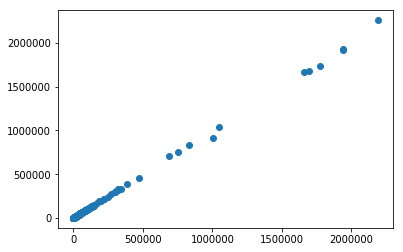

In [44]:
plt.scatter(y_pred, y_test)

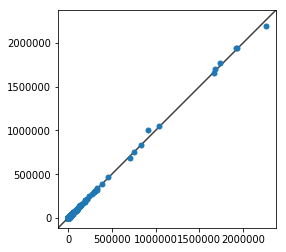

In [45]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

# Emojis mini analysis 

In [46]:
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
clean_emojis_vectorizer = DictVectorizer()
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
X = clean_emojis_vectorizer.fit_transform(Counter(s.split()) for s in clean_emojis)
clean_emojis_features = X.toarray() # Numpy arrays are easy to work with, so I converted the result to an array 

In [47]:
#create list of unique emojis
emojis = set()
for i in range (8809):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            emojis.add(emoji)
emojis = list(emojis)
test = np.zeros(shape=(8809,548))

#create sentence to vector
for i in range (8809):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            test[i][emojis.index(emoji)]+=1


In [48]:
test_emoji = np.zeros(shape=(1,548))
for i in range (8809):
    for j in range(548):
        if test[i][j] > 0:
            test_emoji[:,j]+=test[i][j]

In [49]:
count = 0
count_list = []
for i in range(548):
    if test_emoji[:,i]>250:
        count+=1
        count_list.append(i)
count_list

[2, 17, 29, 78, 123, 169, 471, 539]

In [50]:
clean_features_emoji = pd.DataFrame(data=test[:,count_list])
clean_features_emoji.describe()

,0,1,2,3,4,5,6,7
count,8809.000000,8809.000000,8809.000000,8809.000000,8809.000000,8809.000000,8809.000000,8809.000000
mean,0.032126,0.028494,0.030083,0.089340,0.054717,0.035191,0.281530,0.357362
std,0.211475,0.213063,0.260351,0.285648,0.227439,0.252393,0.673372,0.755770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,6.000000,9.000000,2.000000,1.000000,10.000000,10.000000,4.000000


In [51]:
emoji_set = set()
for i in range (8809):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            if emojis.index(emoji) in count_list:
                emoji_set.add(emoji)
print (' '.join(emoji_set))

🏻 🏼 💙 📸 ❤ 😍 ✨ 📷


In [52]:
by_author = dataset.groupby("author.id").mean()

In [53]:
by_author['category']= pd.cut(by_author['followed'],[-np.inf, 0.01e+08, 0.1e+08, 0.4e+08, 1e+08, np.inf], right=False, labels=['noob','trying','madeit','famous', 'beyonces'])

In [54]:
len(by_author)

635